In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/deuda_2022.csv')

In [8]:
df

,anio,trimestre,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,...,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
0,2018.0,4.0,Diciembre,145/2010,Largo Plazo,Mercado de Capitales,CI BANCO,BONO GDFCB 10-2,25/06/10,12/06/20,...,2.520951e+09,0,0,2.013680e+08,2.013680e+08,2.520951e+09,0.000000e+00,7.9,NaN,7.9
1,2018.0,4.0,Diciembre,224/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 3,457",30/08/07,27/07/37,...,3.457974e+09,0,14809395.11,2.860966e+08,3.009060e+08,3.389146e+09,-1.480940e+07,TIIE,0.35,TIIE+0.35
2,2018.0,4.0,Diciembre,225/2007,Largo Plazo,Banca Comercial,BANCOMER,BANCOMER 7000,31/08/07,27/08/40,...,7.000000e+09,0,108919450.9,5.809492e+08,6.898686e+08,6.371209e+09,-1.089195e+08,8.91,NaN,8.91
3,2018.0,4.0,Diciembre,226/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 4,700",31/08/07,27/07/37,...,4.700000e+09,0,20128593.44,4.018697e+08,4.219983e+08,4.606450e+09,-2.012859e+07,8.8,NaN,8.8
4,2018.0,4.0,Diciembre,513/2008,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,914",26/12/08,25/10/19,...,1.914681e+09,0,320373500.5,2.445093e+07,3.448244e+08,1.277433e+08,-3.203735e+08,TIIE,0.97,TIIE+0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2022.0,2.0,Junio,P09-1014157,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 14,1414972800,1729468800,...,2.500000e+09,0,0,8.114167e+07,8.114167e+07,2.500000e+09,0.000000e+00,6.42,NaN,6.42
666,2022.0,2.0,Junio,P09-0915121,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 15-2,1443139200,1757635200,...,2.500000e+09,0,0,0.000000e+00,0.000000e+00,2.500000e+09,0.000000e+00,6.7,NaN,6.7
667,2022.0,2.0,Junio,P09-0917056,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GCDMXCB 17X,1505779200,1.84E+09,...,2.000000e+09,0,0,0.000000e+00,0.000000e+00,2.000000e+09,0.000000e+00,7.6,NaN,7.6
668,2022.0,2.0,Junio,P09-1118104,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GCDMXCB 18V,1542758400,1857254400,...,1.100000e+09,0,0,5.522183e+07,5.522183e+07,1.100000e+09,0.000000e+00,9.93,NaN,9.93


In [9]:
df = df.drop(669)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anio                         669 non-null    float64
 1   trimestre                    669 non-null    float64
 2   mes                          669 non-null    object 
 3   no_registro                  669 non-null    object 
 4   tipo_deuda                   669 non-null    object 
 5   detalle_tipo_deuda           669 non-null    object 
 6   acreedor                     669 non-null    object 
 7   concepto                     669 non-null    object 
 8   inicio_credito               669 non-null    object 
 9   fin_credito                  669 non-null    object 
 10  dias_contrato                669 non-null    float64
 11  dias_restantes_contrato      669 non-null    int64  
 12  disposicion_inicial_credito  669 non-null    float64
 13  colocacion_periodo  

In [11]:
periods = pd.PeriodIndex(year=df.pop('anio'),
                         quarter=df.pop('trimestre'),
                         name='Fecha')

In [12]:
periods

PeriodIndex(['2018Q4', '2018Q4', '2018Q4', '2018Q4', '2018Q4', '2018Q4',
             '2018Q4', '2018Q4', '2018Q4', '2018Q4',
             ...
             '2022Q2', '2022Q2', '2022Q2', '2022Q2', '2022Q2', '2022Q2',
             '2022Q2', '2022Q2', '2022Q2', '2022Q2'],
            dtype='period[Q-DEC]', name='Fecha', length=669)

In [13]:
df.index = periods.to_timestamp('D')

In [14]:
df

,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,dias_contrato,dias_restantes_contrato,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
Fecha,,,,,,,,,,,,,,,,,,,,
2018-10-01,Diciembre,145/2010,Largo Plazo,Mercado de Capitales,CI BANCO,BONO GDFCB 10-2,25/06/10,12/06/20,3640.0,529,2.520951e+09,0,0,2.013680e+08,2.013680e+08,2.520951e+09,0.000000e+00,7.9,NaN,7.9
2018-10-01,Diciembre,224/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 3,457",30/08/07,27/07/37,10924.0,6783,3.457974e+09,0,14809395.11,2.860966e+08,3.009060e+08,3.389146e+09,-1.480940e+07,TIIE,0.35,TIIE+0.35
2018-10-01,Diciembre,225/2007,Largo Plazo,Banca Comercial,BANCOMER,BANCOMER 7000,31/08/07,27/08/40,12050.0,7910,7.000000e+09,0,108919450.9,5.809492e+08,6.898686e+08,6.371209e+09,-1.089195e+08,8.91,NaN,8.91
2018-10-01,Diciembre,226/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 4,700",31/08/07,27/07/37,10923.0,6783,4.700000e+09,0,20128593.44,4.018697e+08,4.219983e+08,4.606450e+09,-2.012859e+07,8.8,NaN,8.8
2018-10-01,Diciembre,513/2008,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,914",26/12/08,25/10/19,3955.0,298,1.914681e+09,0,320373500.5,2.445093e+07,3.448244e+08,1.277433e+08,-3.203735e+08,TIIE,0.97,TIIE+0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,Junio,P09-1113146,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 13,1385596800,1700092800,3640.0,504,2.126875e+09,0,0,7.580537e+07,7.580537e+07,2.126875e+09,0.000000e+00,7.05,NaN,7.05
2022-04-01,Junio,P09-1014157,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 14,1414972800,1729468800,3640.0,844,2.500000e+09,0,0,8.114167e+07,8.114167e+07,2.500000e+09,0.000000e+00,6.42,NaN,6.42
2022-04-01,Junio,P09-0915121,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 15-2,1443139200,1757635200,3640.0,1170,2.500000e+09,0,0,0.000000e+00,0.000000e+00,2.500000e+09,0.000000e+00,6.7,NaN,6.7


In [15]:
df.groupby('mes').sum()

,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,dias_contrato,dias_restantes_contrato,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
mes,,,,,,,,,,,,,,,,,,,
Diciembre,145/2010224/2007225/2007226/2007513/2008562/20...,Largo PlazoLargo PlazoLargo PlazoLargo PlazoLa...,Mercado de CapitalesBanca ComercialBanca Comer...,CI BANCOBANCOMERBANCOMERBANCOMERBANOBRASBANOBR...,"BONO GDFCB 10-2BANCOMER 3,457BANCOMER 7000BANC...",25/06/1030/08/0731/08/0731/08/0726/12/0828/12/...,12/06/2027/07/3727/08/4027/07/3725/10/1925/10/...,1028363.0,627896,4.282913e+11,37980211028,014809395.11108919450.920128593.44320373500.59...,2.557587e+10,4.708851e+10,3.564528e+11,1.659503e+10,7.9TIIE8.918.8TIIE9.137.67.097.055.745.75TIIE8...,0.350.970.880.380.340.530.350.120.880.320.420....,7.9TIIE+0.358.918.8TIIE+0.979.137.67.977.055.7...
Junio,225/2007226/2007233/2007262/2007721/2011P09-09...,Largo PlazoLargo PlazoLargo PlazoLargo PlazoLa...,Banca ComercialBanca ComercialBanca ComercialB...,BANCOMERBANCOMERHSBCBANOBRASBANAMEXEVERCOREEVE...,"BANCOMER 7000BANCOMER 4,700HSBC 7,000BANOBRAS ...",31/08/0731/08/0707/09/0717/10/0729/12/1125/09/...,27/08/4027/07/3725/09/4725/10/4728/12/2618/09/...,1017128.0,596015,4.214736e+11,0,29119959.165996937.340020209581230333333.30000...,1.012902e+10,1.982505e+10,3.442059e+11,-9.636694e+09,8.918.8TIIETIIETIIETIIE6.77.77.097.026.855.745...,0.530.53TIIE-1.8150.120.880.880.880.410.420.35...,8.918.8TIIE+0.53TIIE+0.53TIIE+TIIE-1.815TIIE+0...
Marzo,226/2007260/2007261/2007P09-0915121P09-1012161...,Largo PlazoLargo PlazoLargo PlazoLargo PlazoLa...,Banca ComercialBanca de DesarrolloBanca de Des...,BANCOMERBANOBRASBANOBRASEVERCOREBANOBRASEVERCO...,"BANCOMER 4,700BANOBRAS 4,806BANOBRAS 4,459BO...",31/08/0717/10/0717/10/0725/09/1507/11/1303/11/...,27/07/3726/10/3725/10/4018/09/2025/11/3221/10/...,1011668.0,612001,4.175707e+11,0,5701204.945529106.058424811.2300002618681.8837...,6.059882e+09,1.126779e+10,3.512472e+11,-5.205636e+09,8.8TIIETIIETIIE7.76.426.855.96TIIETIIETIIE7.63...,0.350.350.120.880.910.360.410.420.970.35TIIE-1...,8.8TIIE+0.35TIIE+0.35TIIE+0.128.586.426.856.87...
Septiembre,145/2010224/2007226/2007329/2007513/2008562/20...,Largo PlazoLargo PlazoLargo PlazoLargo PlazoLa...,Mercado de CapitalesBanca ComercialBanca Comer...,CI BANCOBANCOMERBANCOMERCI BANCOBANOBRASBANOBR...,"BONO GDFCB 10-2BANCOMER 3,457BANCOMER 4,700BON...",25/06/1030/08/0731/08/0717/12/0726/12/0828/12/...,12/06/2027/07/3727/07/3722/11/2725/10/1925/10/...,754796.0,445594,3.134070e+11,8796288493,04641050.166308009.96051097322.019027777.90035...,1.072750e+10,2.228598e+10,2.572368e+11,-2.702309e+09,7.9TIIE8.88.65TIIE9.137.69.935.975.96TIIE5.745...,0.350.970.910.910.320.410.380.340.530.350.53TI...,7.9TIIE+0.358.88.65TIIE+0.979.137.69.936.886.8...


In [17]:
def conv(cadena):
    if cadena == 'Junio':
        return 6
    if cadena == 'Diciembre':
        return 12
    if cadena == 'Marzo':
        return 3
    if cadena == 'Septiembre':
        return 9

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/deuda_2022.csv')
df=df.drop(669)

In [19]:
m=[]
for i in range(0,669):
    m.append(conv(df['mes'].iloc[i]))

In [21]:
m

[12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anio                         669 non-null    float64
 1   trimestre                    669 non-null    float64
 2   mes                          669 non-null    object 
 3   no_registro                  669 non-null    object 
 4   tipo_deuda                   669 non-null    object 
 5   detalle_tipo_deuda           669 non-null    object 
 6   acreedor                     669 non-null    object 
 7   concepto                     669 non-null    object 
 8   inicio_credito               669 non-null    object 
 9   fin_credito                  669 non-null    object 
 10  dias_contrato                669 non-null    float64
 11  dias_restantes_contrato      669 non-null    int64  
 12  disposicion_inicial_credito  669 non-null    float64
 13  colocacion_periodo  

In [22]:
periods = pd.PeriodIndex(year = df['anio'],
                         month = m, freq="D",
                         name = 'Fecha')

In [23]:
periods

PeriodIndex(['2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
             '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
             '2018-12-01', '2018-12-01',
             ...
             '2022-06-01', '2022-06-01', '2022-06-01', '2022-06-01',
             '2022-06-01', '2022-06-01', '2022-06-01', '2022-06-01',
             '2022-06-01', '2022-06-01'],
            dtype='period[D]', name='Fecha', length=669)

In [24]:
df.index = periods.to_timestamp('D')
df

,anio,trimestre,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,...,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
Fecha,,,,,,,,,,,,,,,,,,,,,
2018-12-01,2018.0,4.0,Diciembre,145/2010,Largo Plazo,Mercado de Capitales,CI BANCO,BONO GDFCB 10-2,25/06/10,12/06/20,...,2.520951e+09,0,0,2.013680e+08,2.013680e+08,2.520951e+09,0.000000e+00,7.9,NaN,7.9
2018-12-01,2018.0,4.0,Diciembre,224/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 3,457",30/08/07,27/07/37,...,3.457974e+09,0,14809395.11,2.860966e+08,3.009060e+08,3.389146e+09,-1.480940e+07,TIIE,0.35,TIIE+0.35
2018-12-01,2018.0,4.0,Diciembre,225/2007,Largo Plazo,Banca Comercial,BANCOMER,BANCOMER 7000,31/08/07,27/08/40,...,7.000000e+09,0,108919450.9,5.809492e+08,6.898686e+08,6.371209e+09,-1.089195e+08,8.91,NaN,8.91
2018-12-01,2018.0,4.0,Diciembre,226/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 4,700",31/08/07,27/07/37,...,4.700000e+09,0,20128593.44,4.018697e+08,4.219983e+08,4.606450e+09,-2.012859e+07,8.8,NaN,8.8
2018-12-01,2018.0,4.0,Diciembre,513/2008,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,914",26/12/08,25/10/19,...,1.914681e+09,0,320373500.5,2.445093e+07,3.448244e+08,1.277433e+08,-3.203735e+08,TIIE,0.97,TIIE+0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,2022.0,2.0,Junio,P09-1113146,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 13,1385596800,1700092800,...,2.126875e+09,0,0,7.580537e+07,7.580537e+07,2.126875e+09,0.000000e+00,7.05,NaN,7.05
2022-06-01,2022.0,2.0,Junio,P09-1014157,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 14,1414972800,1729468800,...,2.500000e+09,0,0,8.114167e+07,8.114167e+07,2.500000e+09,0.000000e+00,6.42,NaN,6.42
2022-06-01,2022.0,2.0,Junio,P09-0915121,Largo Plazo,Mercado de Capitales,EVERCORE,BONO GDFECB 15-2,1443139200,1757635200,...,2.500000e+09,0,0,0.000000e+00,0.000000e+00,2.500000e+09,0.000000e+00,6.7,NaN,6.7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 669 entries, 2018-12-01 to 2022-06-01
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anio                         669 non-null    float64
 1   trimestre                    669 non-null    float64
 2   mes                          669 non-null    object 
 3   no_registro                  669 non-null    object 
 4   tipo_deuda                   669 non-null    object 
 5   detalle_tipo_deuda           669 non-null    object 
 6   acreedor                     669 non-null    object 
 7   concepto                     669 non-null    object 
 8   inicio_credito               669 non-null    object 
 9   fin_credito                  669 non-null    object 
 10  dias_contrato                669 non-null    float64
 11  dias_restantes_contrato      669 non-null    int64  
 12  disposicion_inicial_credito  669 non-null    float64
 13  c

In [25]:
df = df.reindex(columns=['acreedor','pago_servicio_deuda','endeudamiento_periodo'])

In [26]:
df

,acreedor,pago_servicio_deuda,endeudamiento_periodo
Fecha,,,
2018-12-01,CI BANCO,2.013680e+08,0.000000e+00
2018-12-01,BANCOMER,3.009060e+08,-1.480940e+07
2018-12-01,BANCOMER,6.898686e+08,-1.089195e+08
2018-12-01,BANCOMER,4.219983e+08,-2.012859e+07
2018-12-01,BANOBRAS,3.448244e+08,-3.203735e+08
...,...,...,...
2022-06-01,EVERCORE,7.580537e+07,0.000000e+00
2022-06-01,EVERCORE,8.114167e+07,0.000000e+00
2022-06-01,EVERCORE,0.000000e+00,0.000000e+00


In [27]:
df.columns.name = 'variables'

In [28]:
df

variables,acreedor,pago_servicio_deuda,endeudamiento_periodo
Fecha,,,
2018-12-01,CI BANCO,2.013680e+08,0.000000e+00
2018-12-01,BANCOMER,3.009060e+08,-1.480940e+07
2018-12-01,BANCOMER,6.898686e+08,-1.089195e+08
2018-12-01,BANCOMER,4.219983e+08,-2.012859e+07
2018-12-01,BANOBRAS,3.448244e+08,-3.203735e+08
...,...,...,...
2022-06-01,EVERCORE,7.580537e+07,0.000000e+00
2022-06-01,EVERCORE,8.114167e+07,0.000000e+00
2022-06-01,EVERCORE,0.000000e+00,0.000000e+00


In [29]:
long_data = (df.stack()
             .reset_index()
             .rename(columns={0: 'valor'}))

In [30]:
long_data

,Fecha,variables,valor
0,2018-12-01,acreedor,CI BANCO
1,2018-12-01,pago_servicio_deuda,201367979.7
2,2018-12-01,endeudamiento_periodo,0.0
3,2018-12-01,acreedor,BANCOMER
4,2018-12-01,pago_servicio_deuda,300906043.8
...,...,...,...
2002,2022-06-01,pago_servicio_deuda,0.0
2003,2022-06-01,endeudamiento_periodo,0.0
2004,2022-06-01,acreedor,EVERCORE
2005,2022-06-01,pago_servicio_deuda,55221833.33


# Gráficos y visualización

In [31]:
data=[3,2,5,2,1,5,3,5,7]

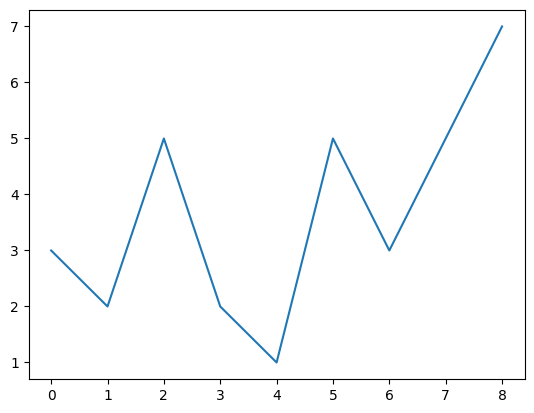

In [32]:
plt.plot(data)

### Figuras y subgráficos

Los gráficos en matplotlib residen dentro de un objeto Figure. Se puede crer una nueva figura con plt.figure:

In [33]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

La función **plt.figure** tiene distintas opciones; en particular, figsize garantiza que la figura tenga un determinado tamaño y una cierta proporción de aspecto. Es necesario crear uno o varios subgráficos empleando **add_subplot**:

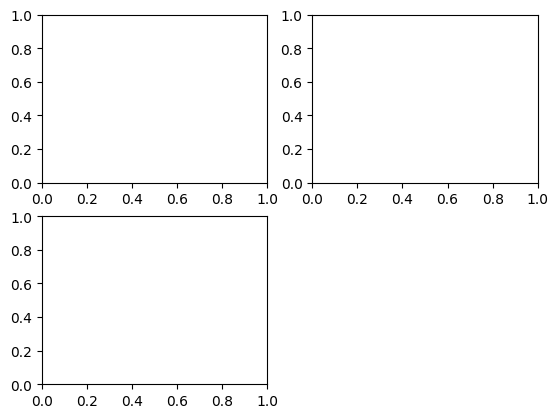

In [34]:
# 2 × 2 (hasta cuatro gráficos en total)
fig = plt.figure() 
ax1 = fig.add_subplot(2, 2, 1) #  el primero de cuatro subgráficos
ax2 = fig.add_subplot(2, 2, 2) #  el segundo de cuatro subgráficos
ax3 = fig.add_subplot(2, 2, 3)

Podemos ir añadiendo subgráficos:

In [35]:
ax1.hist(np.random.standard_normal(100), 
         bins=20, color='black', alpha = 0.5);

# alpha=0.3 configura la transparencia del gráfico
# bins es el número de particiones

In [36]:
ax2.scatter(np.arange(30), 
            np.arange(30) + 3 * np.random.standard_normal(30));

In [37]:
# gráfico de líneas con el método plot

ax3.plot(np.random.standard_normal(50).cumsum(), color='black',
         linestyle='dashed');

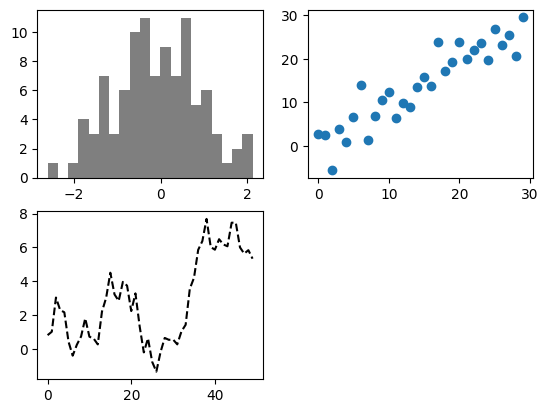

In [38]:
fig

Estilos de linea:

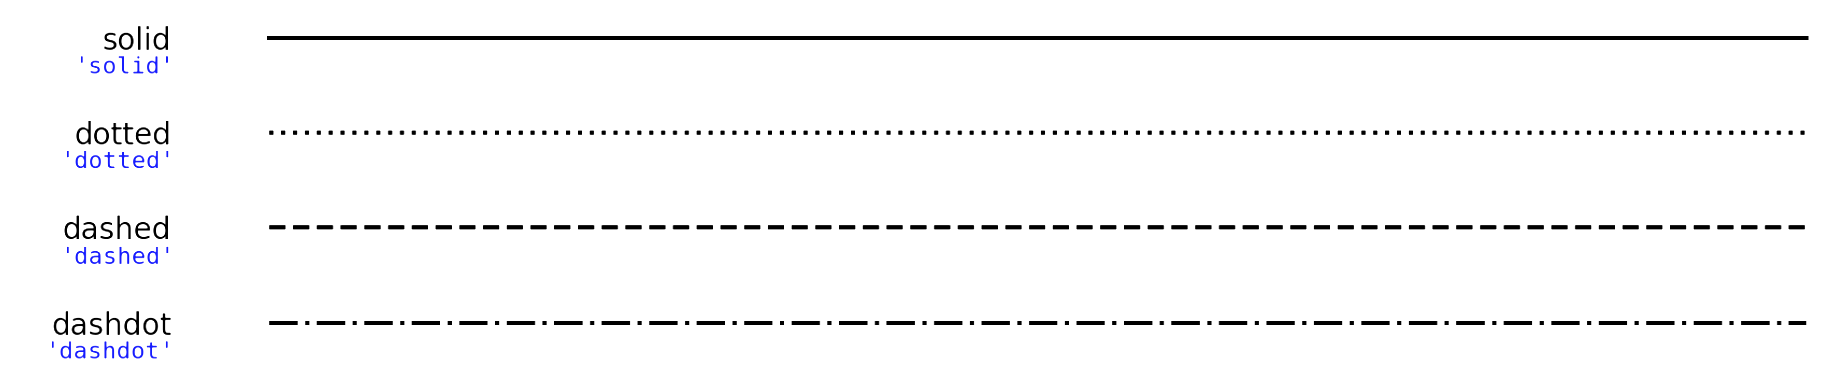

Para que la creación de una cuadrícula de subgráficos sea más cómoda, matplotlib incluye un método plt.subplots que crea una figura nueva y devuelve un array NumPy, que contiene los objetos de subgráficos creados:

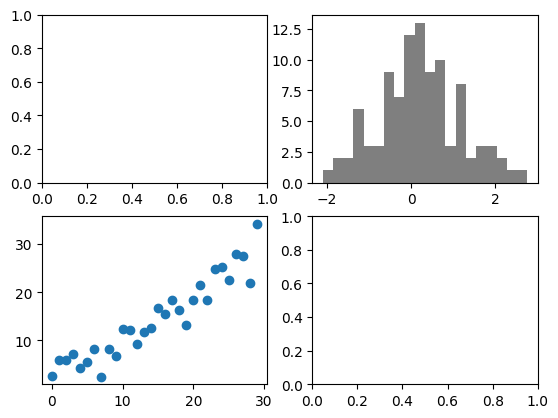

In [39]:
fig, axes = plt.subplots(2, 2)

axes[0, 1].hist(np.random.standard_normal(100), 
         bins=20, color='black', alpha=0.5);

axes[1, 0].scatter(np.arange(30), 
            np.arange(30) + 3 * np.random.standard_normal(30));

In [40]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

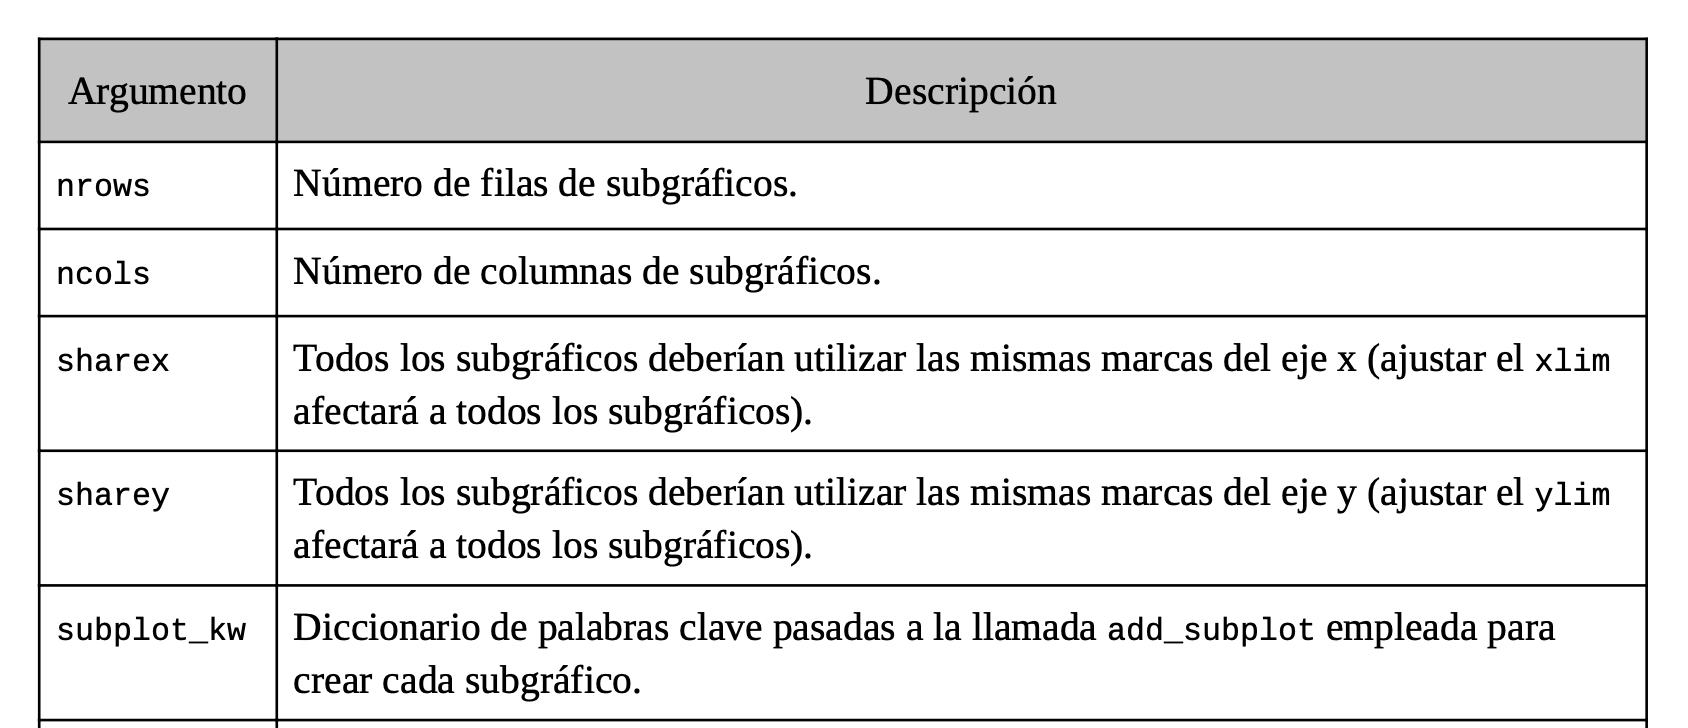

Se puede cambiar el espacio libre usando el método **subplots_adjust** en objetos Figure:

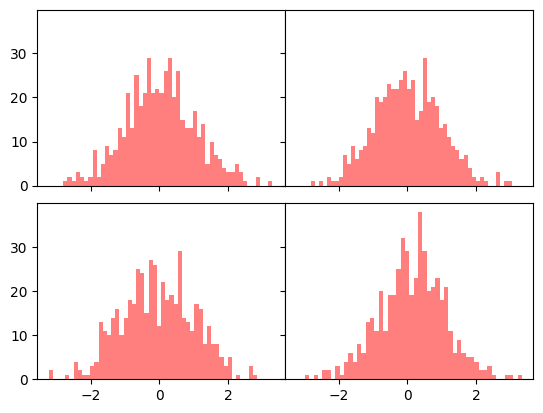

In [46]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color='red', alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0.1)

**wspace** y **hspace** controlan el porcentaje de la anchura y altura de la figura, respectivamente, para utilizarlo como espaciado entre subgráficos.

In [48]:
df = pd.read_csv('redmet_2023_05.csv')

La Red de Meteorología y Radiación Solar (REDMET) es el subsistema del Sistema de Monitoreo Atmosférico de la Ciudad de México (SIMAT) que realiza mediciones continuas y permanentes minuto a minuto de temperatura (TMP), humedad relativa (RH), dirección del viento (WDR) y la velocidad del viento (WSP).

En este conjunto podrás encontrar los promedios diarios de los registros de estos parámetros para la Ciudad de México.

In [49]:
df

,fecha,RH,TMP,WDR,WSP
0,2015-01-01,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...
3068,2023-05-27,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,58.837742,17.039153,169.527919,1.952284
3071,2023-05-30,50.145719,18.684699,184.998255,1.978709


In [50]:
df=df.iloc[0:365]

In [51]:
df

,fecha,RH,TMP,WDR,WSP
0,2015-01-01,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...
360,2015-12-27,51.462891,16.580859,179.712092,3.320921
361,2015-12-28,46.672619,14.301190,158.097222,1.662302
362,2015-12-29,48.090744,16.570417,183.606884,2.264130
363,2015-12-30,52.071038,17.190164,186.452899,1.493116


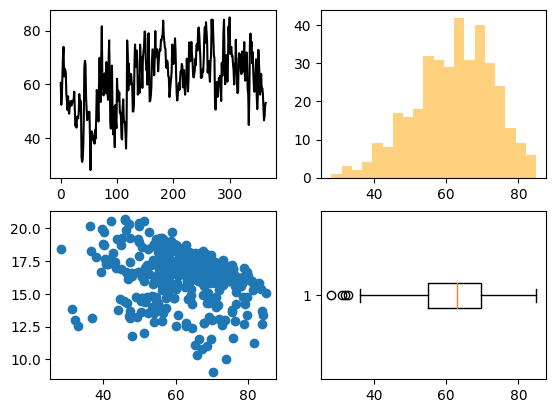

In [52]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(df['RH'], color='black');

axes[0, 1].hist(df['RH'], 
         bins=20, color='orange', alpha=0.5);

axes[1, 0].scatter(df['RH'],df['TMP']);

axes[1, 1].boxplot(df['RH'], vert = False);

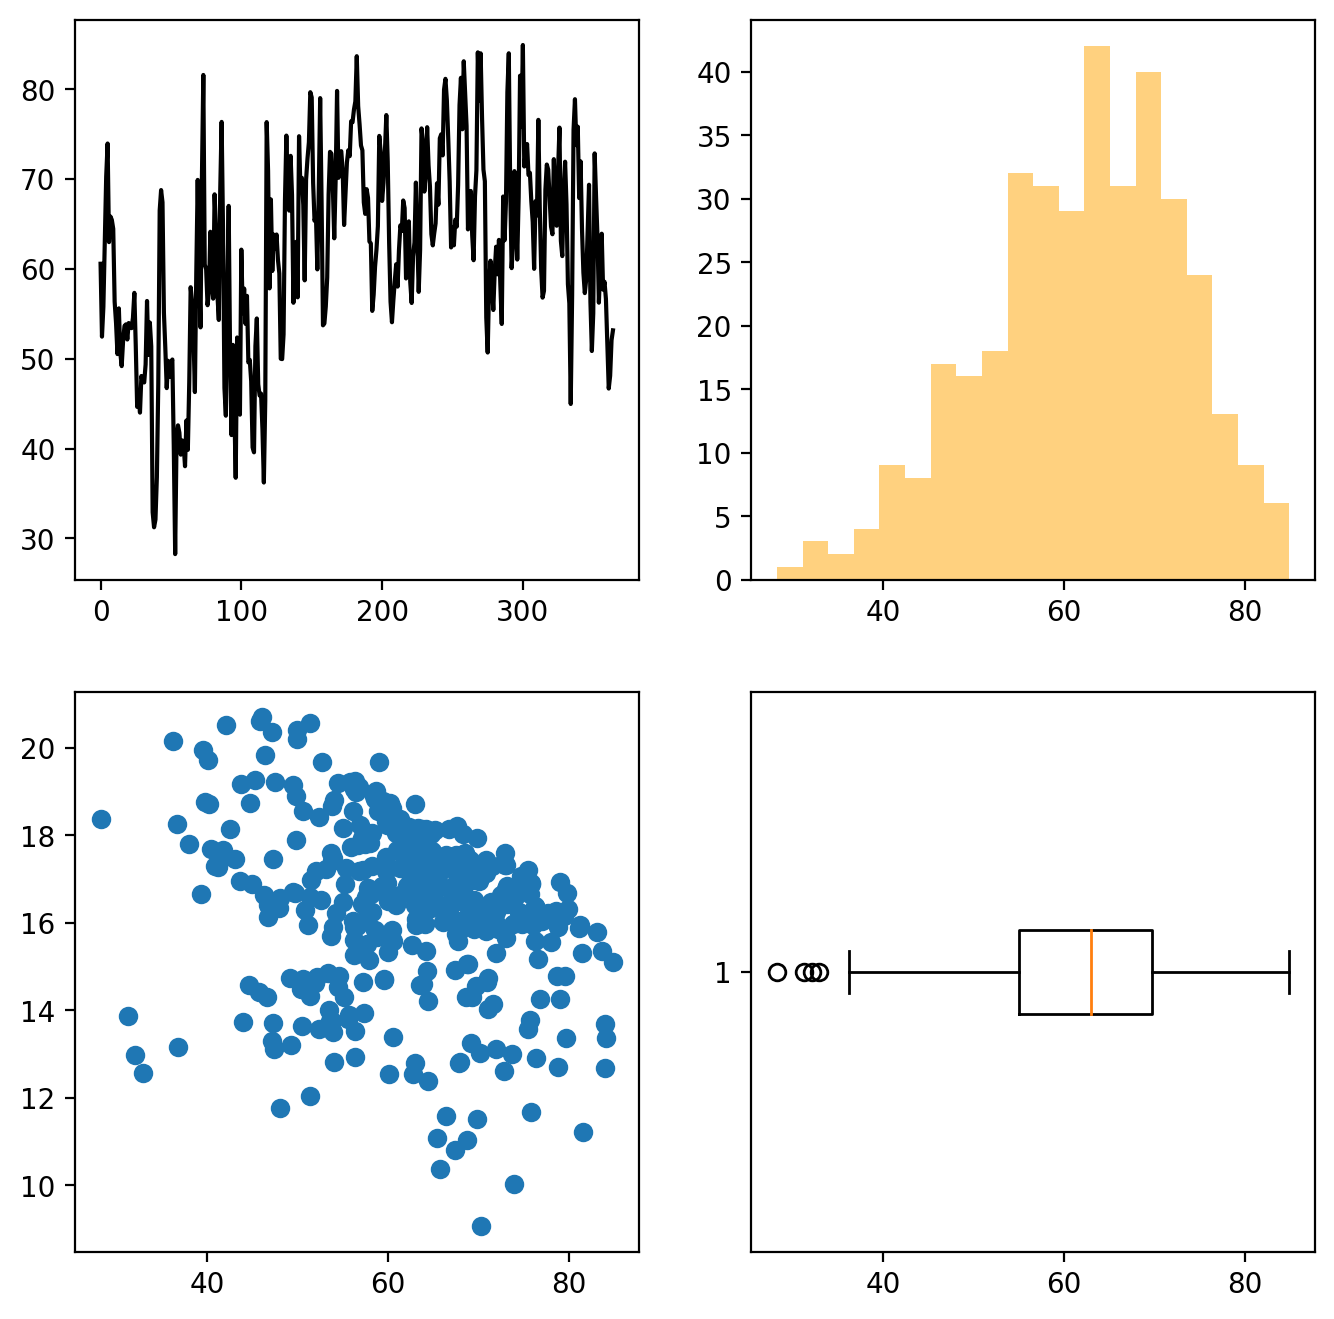

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(8,8), dpi=200)

axes[0, 0].plot(df['RH'], color='black');

axes[0, 1].hist(df['RH'], 
         bins=20, color='orange', alpha=0.5);

axes[1, 0].scatter(df['RH'],df['TMP']);

axes[1, 1].boxplot(df['RH'], vert = False);

In [55]:
df = pd.read_excel('contam2022.xlsx')
df

,Fecha,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
0,2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
1,2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2,2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
3,2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
4,2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000
...,...,...,...,...,...,...
360,2022-12-27,19.041667,5.750000,18.541667,5.583333,39.500000
361,2022-12-28,17.041667,11.000000,19.125000,8.583333,53.666667
362,2022-12-29,14.083333,4.750000,16.791667,7.625000,42.416667
363,2022-12-30,12.416667,4.916667,17.625000,10.166667,45.500000


In [56]:
df.columns = ['Fecha','ozono','d_azufre',
               'd_nitrogeno',
               'm_carbono',
               'PM10']

In [57]:
df

,Fecha,ozono,d_azufre,d_nitrogeno,m_carbono,PM10
0,2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
1,2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2,2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
3,2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
4,2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000
...,...,...,...,...,...,...
360,2022-12-27,19.041667,5.750000,18.541667,5.583333,39.500000
361,2022-12-28,17.041667,11.000000,19.125000,8.583333,53.666667
362,2022-12-29,14.083333,4.750000,16.791667,7.625000,42.416667
363,2022-12-30,12.416667,4.916667,17.625000,10.166667,45.500000


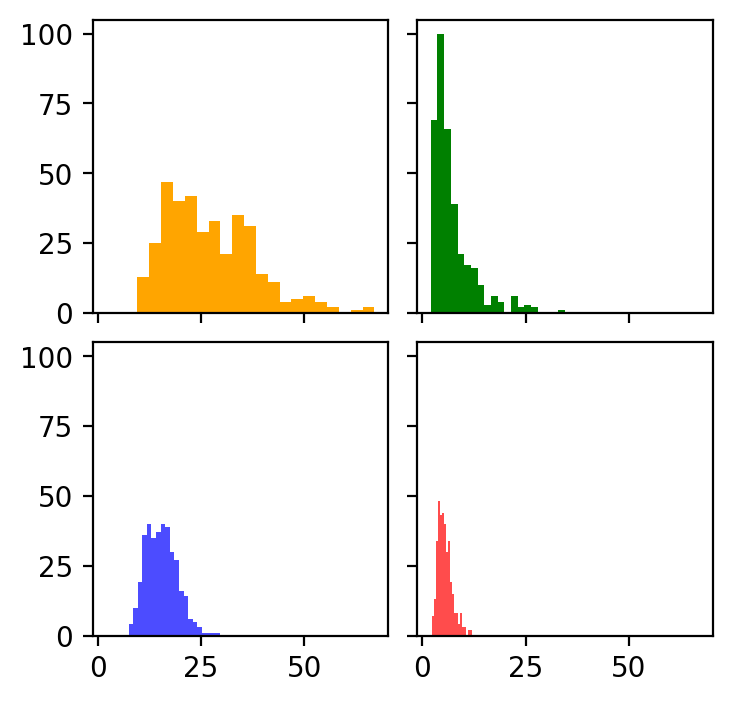

In [62]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,
                         figsize=(4,4), dpi=200)

axes[0, 0].hist(df['ozono'], bins=20, color='orange');
axes[0, 1].hist(df['d_azufre'], bins=20, color='green', alpha=1);
axes[1, 0].hist(df['d_nitrogeno'], bins=20, color='blue', alpha=0.7);
axes[1, 1].hist(df['m_carbono'], bins=20, color='red', alpha=0.7);

fig.subplots_adjust(wspace=0.1, hspace=0.1)